







# DMart Products Analysis
## An End-to-End Data Analytics Project (SQL + Python(EDA + Pandas + Matplotlib) + Visualization)

## Key Business Questions  
1.   Pricing & Discount Impact

   * Analyze the difference between `Price` and `DiscountedPrice`.
   * Identify which products or categories have higher discounts and whether those products are sold more.

2.   Category & SubCategory Performance

   * Evaluate the performance of different `Category` and `SubCategory`.
   * Find the Top 3 and Bottom 3 performing categories based on sales and revenue.

3.   Brand Analysis

   * Compare different `Brand` performance in terms of total revenue and quantity sold.
   * Identify the leading brands within specific categories (e.g., Amul in Dairy, Coca Cola in Beverages).

4.   Quantity Sold (Demand Analysis)

   * Identify high-demand vs. low-demand products using the `Quantity` column.
   * Check for seasonal or trend-based demand patterns (e.g., soft drinks in summer).





## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
df = pd.read_csv("Dmart.csv")

## Check first 5 rows

In [ ]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


## check last 5 rows

In [ ]:
df.tail()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs
5188,Navneet Youva Canvas Board (10x12 Inches),Navneet,90.0,75.0,School Supplies,School Needs,1 U,OverviewCoated with a double layer of acrylic ...,School Supplies > School Needs


## Save Data into SQLite Database

In [ ]:
# Create a SQLite database connection
conn = sqlite3.connect("C:/Users/YGOLU/desktop/Dmartproject/dmart.db")
#  dataframe to SQL table
df.to_sql("dmart_products", conn, if_exists="replace", index=False)
# Verify by running a SQL query
query = "SELECT * FROM dmart_products LIMIT 5;"
print(pd.read_sql(query, conn))

## Shape of Data


In [ ]:
df.shape

(5189, 9)

## Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


## Dataset Columns

In [ ]:
df.columns

Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory',
       'Quantity', 'Description', 'BreadCrumbs'],
      dtype='object')

## Change datatype of Columns

In [ ]:
df['Quantity'] = df['Quantity'].astype(str).str.extract(r'(\d+)').astype('Int64')

In [ ]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["DiscountedPrice"] = pd.to_numeric(df["DiscountedPrice"], errors="coerce")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5014 non-null   Int64  
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: Int64(1), float64(2), object(6)
memory usage: 370.0+ KB


##  statistical summary on categorical columns

In [ ]:
df.describe(include='object').T


,count,unique,top,freq
Name,5188,4360,Elle 18 Nail Pops Nail Colour - Shade 39,7
Brand,4789,822,Premia,155
Category,5186,29,Personal Care,1234
SubCategory,5186,86,Snacks & Farsans,302
Description,5187,3616,India,604
BreadCrumbs,5186,97,Packaged Food > Snacks & Farsans,291


In [ ]:
df.describe()

,Price,DiscountedPrice,Quantity
count,5188.000000,5188.000000,5014.0
mean,344.030360,236.669719,150.573394
std,601.034092,387.198716,205.253919
min,0.000000,0.000000,0.0
25%,85.000000,64.000000,4.0
50%,175.000000,125.000000,60.0
75%,345.000000,249.000000,200.0
max,10990.000000,7999.000000,2000.0


## Check null counts

In [ ]:
df.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity           175
Description          2
BreadCrumbs          3
dtype: int64

# EDA(Exploratory Data Analysis)

# missing values handle + chek duplicates and drop duplicates values + outliers detect & handle

In [ ]:
# Drop rows where Name is missing
df = df.dropna(subset=['Name'])

In [ ]:
# हर (Category, SubCategory) में सबसे common Brand निकालो
df['Brand'] = df['Brand'].fillna(
    df.groupby(['Category','SubCategory'])['Brand']
      .transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")
)


In [ ]:
df["Brand"].fillna("Unknown")

0        Premia
1        Premia
2        Premia
3        Nutraj
4        Nutraj
         ...   
5184    Navneet
5185    Navneet
5186    Navneet
5187    Navneet
5188    Navneet
Name: Brand, Length: 5188, dtype: object

In [ ]:
df["Category"].fillna("Unknown")

0               Grocery
1               Grocery
2               Grocery
3               Grocery
4               Grocery
             ...       
5184    School Supplies
5185    School Supplies
5186    School Supplies
5187    School Supplies
5188    School Supplies
Name: Category, Length: 5188, dtype: object

In [ ]:
df['Quantity'] = df['Quantity'].astype(float)
df['DiscountedPrice'] = df['DiscountedPrice'].astype(float)


In [ ]:
df['Price'].fillna(df['Price'].median(), inplace=True)
df['DiscountedPrice'].fillna(df['DiscountedPrice'].median(), inplace=True)


In [ ]:
df['Category'].fillna("Unknown", inplace=True)
df['SubCategory'].fillna("Unknown", inplace=True)
df['BreadCrumbs'].fillna("Unknown", inplace=True)


In [ ]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)


In [ ]:
df['Description'].fillna("Not Available", inplace=True)


In [ ]:
df["Category"].fillna("Unknown", inplace=True)


In [ ]:
df.dropna(subset=["Category"]).copy()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500.0,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100.0,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200.0,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500.0,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1.0,USA,Grocery > Dry Fruits
...,...,...,...,...,...,...,...,...,...
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1.0,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1.0,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1.0,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1.0,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs


In [ ]:
#  Check total duplicates (completely same row)
print(df.duplicated().sum())

15


In [ ]:
# check duplicates only on some columns (Name, Brand, Quantity, Price)
duplicates = df[df.duplicated(subset=["Name", "Brand", "Quantity", "Price"], keep=False)]
print(duplicates)

                                                   Name    Brand   Price  \
2772             Cortina Elastic Chair Cover - Jacquard  Cortina   399.0   
2773             Cortina Elastic Chair Cover - Jacquard  Cortina   399.0   
2774             Cortina Elastic Chair Cover - Jacquard  Cortina   399.0   
2813  Unigreen Compostable Green Garbage Bag 19X21 I...  Premier    99.0   
2814  Unigreen Compostable Green Garbage Bag 19X21 I...  Premier    99.0   
...                                                 ...      ...     ...   
5045               Zeel LP306 Women's Raincoat - Orange     Zeel   550.0   
5046   Zeel MT212 Men's Raincoat - Navy Blue : Size XXL     Zeel  1199.0   
5047   Zeel MT212 Men's Raincoat - Navy Blue : Size XXL     Zeel  1199.0   
5148                         Linc Pentonic Blue Gel Pen     Linc    50.0   
5149                         Linc Pentonic Blue Gel Pen     Linc    50.0   

      DiscountedPrice         Category             SubCategory  Quantity  \
2772       

In [ ]:
#  Drop those duplicates
df = df.drop_duplicates(subset=["Name", "Brand", "Quantity", "Price"], keep="first")

In [ ]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500.0,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100.0,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200.0,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500.0,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1.0,USA,Grocery > Dry Fruits


In [ ]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64

In [ ]:
df.shape

(5105, 9)

In [ ]:
df[['Price','Quantity','DiscountedPrice']].describe()


,Price,Quantity,DiscountedPrice
count,5105.000000,5105.000000,5105.000000
mean,341.847113,148.938492,234.915671
std,603.582957,203.675422,387.575796
min,0.000000,0.000000,0.000000
25%,85.000000,4.000000,63.000000
50%,170.000000,60.000000,125.000000
75%,330.000000,200.000000,249.000000
max,10990.000000,2000.000000,7999.000000


##  Outliers detect

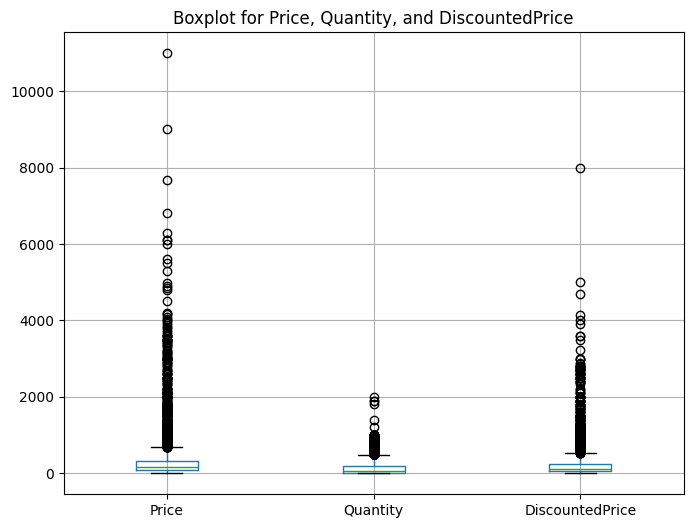

In [ ]:
df[['Price', 'Quantity', 'DiscountedPrice']].boxplot(figsize=(8,6))
plt.title("Boxplot for Price, Quantity, and DiscountedPrice")
plt.show()


## Outlier Handle

In [ ]:
import numpy as np

# 1. PRICE → Remove Outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_price = Q1 - 1.5 * IQR
upper_limit_price = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_limit_price) & (df['Price'] <= upper_limit_price)]


# 2. QUANTITY → Cap Outliers
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_qty = Q1 - 1.5 * IQR
upper_limit_qty = Q3 + 1.5 * IQR

df['Quantity'] = np.where(df['Quantity'] > upper_limit_qty, upper_limit_qty,
                   np.where(df['Quantity'] < lower_limit_qty, lower_limit_qty, df['Quantity']))


# 3. DISCOUNTED PRICE → Remove Outliers
Q1 = df['DiscountedPrice'].quantile(0.25)
Q3 = df['DiscountedPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_disc = Q1 - 1.5 * IQR
upper_limit_disc = Q3 + 1.5 * IQR

df = df[(df['DiscountedPrice'] >= lower_limit_disc) & (df['DiscountedPrice'] <= upper_limit_disc)]


In [ ]:
df[['Price','Quantity','DiscountedPrice']].describe()


,Price,Quantity,DiscountedPrice
count,4425.000000,4425.000000,4425.000000
mean,179.764389,145.262373,128.894124
std,134.051951,167.957047,92.586070
min,0.000000,0.000000,0.000000
25%,75.000000,5.000000,55.000000
50%,145.000000,80.000000,99.000000
75%,249.000000,200.000000,180.000000
max,697.000000,494.000000,402.000000


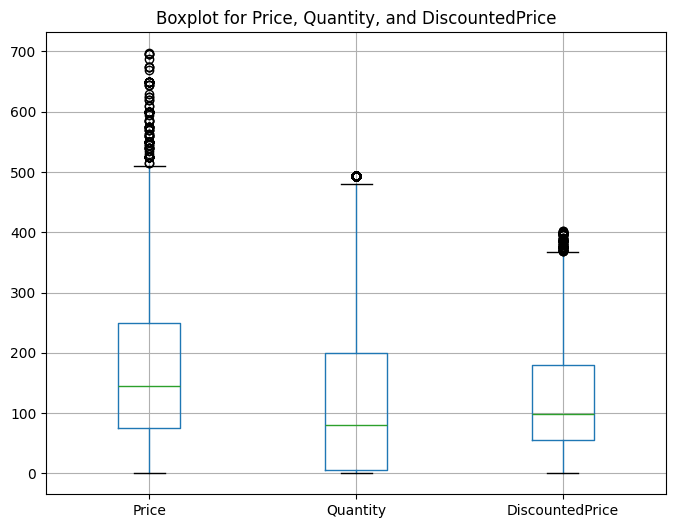

In [ ]:
df[['Price', 'Quantity', 'DiscountedPrice']].boxplot(figsize=(8,6))
plt.title("Boxplot for Price, Quantity, and DiscountedPrice")
plt.show()

# Feature Engineering based on  Questions

 ## 1. Pricing & Discount Impact

   * Analyze the difference between `Price` and `DiscountedPrice`.
   * Identify which products or categories have higher discounts and whether those

In [ ]:
# Create Discount Percentage
df['DiscountPercent'] = ((df['Price'] - df['DiscountedPrice']) / df['Price']) * 100

# Create Revenue (based on discounted price)
df['Revenue'] = df['DiscountedPrice'] * df['Quantity']

# Create Original Revenue (if sold at original price)
df['OriginalRevenue'] = df['Price'] * df['Quantity']

# Calculate Revenue Loss due to discounts
df['RevenueLoss'] = df['OriginalRevenue'] - df['Revenue']

## 2. Category & SubCategory Performance

   * Evaluate the performance of different `Category` and `SubCategory`.
   * Find the Top 3 and Bottom 3 performing categories based on sales and revenue.

In [ ]:
# Aggregate revenue and quantity by Category
category_perf = df.groupby('Category').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    AvgDiscount=('DiscountPercent', 'mean')
).reset_index()

# Aggregate revenue and quantity by SubCategory
subcategory_perf = df.groupby('SubCategory').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    AvgDiscount=('DiscountPercent', 'mean')
).reset_index()


## 3.  Brand Analysis

   * Compare different `Brand` performance in terms of total revenue and quantity sold.
   * Identify the leading brands within specific categories (e.g., Amul in Dairy, Coca Cola in Beverages).

In [ ]:
# Aggregate revenue and quantity by Brand
brand_perf = df.groupby('Brand').agg(
    BrandRevenue=('Revenue', 'sum'),
    BrandQuantity=('Quantity', 'sum'),
    AvgDiscount=('DiscountPercent', 'mean')
).reset_index()

# Within each Category, find the top Brand
top_brands = df.groupby(['Category', 'Brand']).agg(
    Revenue=('Revenue', 'sum'),
    Quantity=('Quantity', 'sum')
).reset_index()

# Rank brands within category
top_brands['Rank'] = top_brands.groupby('Category')['Revenue'].rank(method='dense', ascending=False)


## 4. Quantity Sold (Demand Analysis)

   * Identify high-demand vs. low-demand products using the `Quantity` column.
   * Check for seasonal or trend-based demand patterns (e.g., soft drinks in summer).

In [ ]:
# Create Demand Flag
df['DemandLevel'] = pd.qcut(df['Quantity'], q=3, labels=['Low', 'Medium', 'High'])

# (Optional) Monthly demand trend (if date column exists)
# df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')
# monthly_demand = df.groupby(['Month','Category']).agg(TotalQuantity=('Quantity','sum')).reset_index()


In [ ]:
print(df.columns)

Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory',
       'Quantity', 'Description', 'BreadCrumbs', 'DiscountPercent', 'Revenue',
       'OriginalRevenue', 'RevenueLoss', 'DemandLevel'],
      dtype='object')


In [ ]:
df.dtypes

Name                 object
Brand                object
Price               float64
DiscountedPrice     float64
Category             object
SubCategory          object
Quantity            float64
Description          object
BreadCrumbs          object
DiscountPercent     float64
Revenue             float64
OriginalRevenue     float64
RevenueLoss         float64
DemandLevel        category
dtype: object

In [ ]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,DiscountPercent,Revenue,OriginalRevenue,RevenueLoss,DemandLevel
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,494.0,India,Grocery > Grocery/Dry Fruits,27.050998,162526.0,222794.0,60268.0,High
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100.0,India,Grocery > Grocery/Dry Fruits,22.018349,8500.0,10900.0,2400.0,Medium
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200.0,India,Grocery > Grocery/Dry Fruits,13.366337,35000.0,40400.0,5400.0,High
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,494.0,USA,Grocery > Dry Fruits,41.736227,172406.0,295906.0,123500.0,High
5,Chana Dal,Satyam,49.0,42.0,Grocery,Dals,494.0,India,Grocery > Dals,14.285714,20748.0,24206.0,3458.0,High


In [ ]:
df.columns

Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory',
       'Quantity', 'Description', 'BreadCrumbs', 'DiscountPercent', 'Revenue',
       'OriginalRevenue', 'RevenueLoss', 'DemandLevel'],
      dtype='object')

# Answer Business Question using SQL

## 1: Pricing & Discount Impact
* What is the average discount percentage?
* Which categories give the highest average discount?

In [ ]:
import pandas as pd

# -------------------------
# Business Problem 1: Pricing & Discount Impact
# -------------------------

# Average discount across all products
query_avg_discount = """
SELECT 
    ROUND(AVG((Price - DiscountedPrice) * 100.0 / Price), 2) AS avg_discount_percentage
FROM dmart_products;
"""
avg_discount = pd.read_sql_query(query_avg_discount, conn)
print("Average Discount %:\n", avg_discount)

# Category-wise average discount
query_category_discount = """
SELECT 
    Category,
    ROUND(AVG((Price - DiscountedPrice) * 100.0 / Price), 2) AS avg_discount_percentage
FROM dmart_products
GROUP BY Category
ORDER BY avg_discount_percentage DESC;
"""
category_discount = pd.read_sql_query(query_category_discount, conn)
print("\nCategory-wise Discount %:\n", category_discount)

Average Discount %:
    avg_discount_percentage
0                    26.39

Category-wise Discount %:
                          Category  avg_discount_percentage
0                            Geep                    61.87
1                    Smartwatches                    58.34
2                       Butterfly                    57.47
3                       Zebronics                    56.75
4                       Backpacks                    51.73
5                            None                    50.01
6                          Pigeon                    49.96
7                      Wonderchef                    49.08
8                           Syska                    43.80
9            Computer Accessories                    37.61
10                  Joyo Plastics                    36.89
11                       Specials                    32.72
12         Clothing & Accessories                    32.36
13                     Appliances                    31.65
14          

## 2. Category & SubCategory Performance
* Which are the Top 3 and Bottom 3 categories based on revenue?

In [ ]:
# Top 3 categories by revenue
query_top_categories = """
SELECT 
    Category,
    SUM(DiscountedPrice * Quantity) AS total_revenue
FROM dmart_products
GROUP BY Category
ORDER BY total_revenue DESC
LIMIT 3;
"""
top3_categories = pd.read_sql_query(query_top_categories, conn)
print("\nTop 3 Categories by Revenue:\n", top3_categories)


Top 3 Categories by Revenue:
         Category  total_revenue
0     Appliances    36443620.50
1  Personal Care    35185444.95
2  Packaged Food    31262698.01


## 3: Brand Analysis
  * Which brands generate the highest revenue?
  * Which brands sell the most units?

In [ ]:
# Bottom 3 categories by revenue
query_bottom_categories = """
SELECT 
    Category,
    SUM(DiscountedPrice * Quantity) AS total_revenue
FROM dmart_products
GROUP BY Category
ORDER BY total_revenue ASC
LIMIT 3;
"""
bottom3_categories = pd.read_sql_query(query_bottom_categories, conn)
print("\nBottom 3 Categories by Revenue:\n", bottom3_categories)



Bottom 3 Categories by Revenue:
                  Category  total_revenue
0           Joyo Plastics            0.0
1                Raincoat            0.0
2  Clothing & Accessories          357.0


## 4: Quantity Sold (Demand Analysis)
* Which products are High, Medium, and Low Demand?

In [ ]:
# Demand level classification of products
query_demand_classification = """
SELECT 
    Name,
    Category,
    Quantity,
    CASE 
        WHEN Quantity >= 200 THEN 'High Demand'
        WHEN Quantity BETWEEN 100 AND 199 THEN 'Medium Demand'
        ELSE 'Low Demand'
    END AS demand_level
FROM dmart_products
ORDER BY Quantity DESC;
"""
demand_classification = pd.read_sql_query(query_demand_classification, conn)
print("\nDemand Classification:\n", demand_classification)

# Category-wise total demand
query_category_demand = """
SELECT 
    Category,
    SUM(Quantity) AS total_quantity_sold
FROM dmart_products
GROUP BY Category
ORDER BY total_quantity_sold DESC;
"""
category_demand = pd.read_sql_query(query_category_demand, conn)
print("\nCategory-wise Demand:\n", category_demand)


Demand Classification:
                                                    Name  \
0     Trident Comfort Living Double Bedsheet ZOEPI 1...   
1     Trident Comfort Living Double Bedsheet ZOEPE 1...   
2     In Shape Ladies Inner Elastic Hipster Panties - C   
3     In Shape Ladies Inner Elastic Hipster Panties - B   
4     In Shape Ladies Inner Elastic Hipster Panties - B   
...                                                 ...   
5184                                    Wada Kolam Rice   
5185                                   Silky Kolam Rice   
5186                      Eco Kolam Jirasar Sorted Rice   
5187                          Force 10 Bathroom Cleaner   
5188   Zeel MT212 Men's Raincoat - Navy Blue : Size XXL   

                    Category       Quantity demand_level  
0             Home & Kitchen       Zoe Pink  High Demand  
1             Home & Kitchen       ZOE Peri  High Demand  
2     Clothing & Accessories  XXXL (105 cm)  High Demand  
3     Clothing & Accessories  

In [ ]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,DiscountPercent,Revenue,OriginalRevenue,RevenueLoss,DemandLevel
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,494.0,India,Grocery > Grocery/Dry Fruits,27.050998,162526.0,222794.0,60268.0,High
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100.0,India,Grocery > Grocery/Dry Fruits,22.018349,8500.0,10900.0,2400.0,Medium
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200.0,India,Grocery > Grocery/Dry Fruits,13.366337,35000.0,40400.0,5400.0,High
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,494.0,USA,Grocery > Dry Fruits,41.736227,172406.0,295906.0,123500.0,High
5,Chana Dal,Satyam,49.0,42.0,Grocery,Dals,494.0,India,Grocery > Dals,14.285714,20748.0,24206.0,3458.0,High


# Visualization

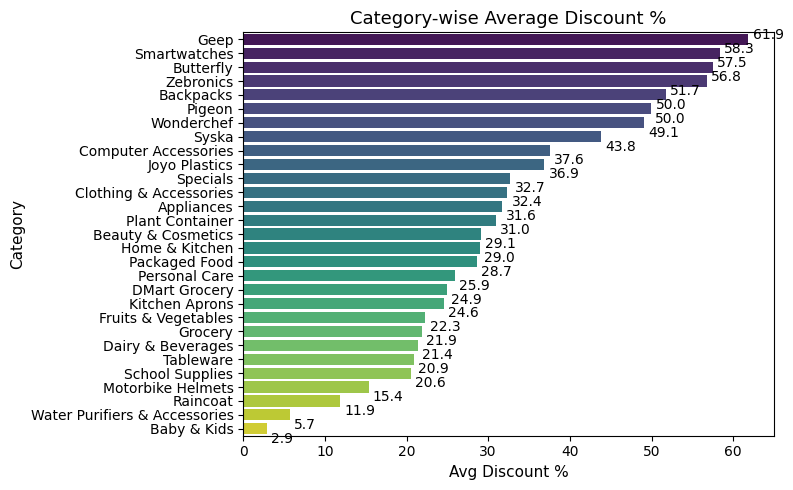

In [ ]:
# Category-wise Average Discount

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))  # medium size
ax = sns.barplot(
    data=category_discount,
    y="Category",
    x="avg_discount_percentage",
    palette="viridis"
)

plt.title("Category-wise Average Discount %", fontsize=13)  # thoda bada
plt.xlabel("Avg Discount %", fontsize=11)
plt.ylabel("Category", fontsize=11)

# Values ko bar ke saath show karna
for i, v in enumerate(category_discount["avg_discount_percentage"]):
    ax.text(v + 0.5, i, f"{v:.1f}", fontsize=10)

plt.tight_layout()
plt.show()


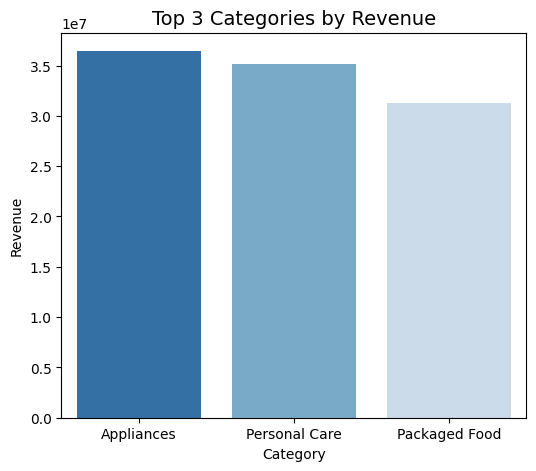

In [ ]:
#Top 3 Categories by Revenue

plt.figure(figsize=(6,5))
sns.barplot(data=top3_categories, x="Category", y="total_revenue", palette="Blues_r")
plt.title("Top 3 Categories by Revenue", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

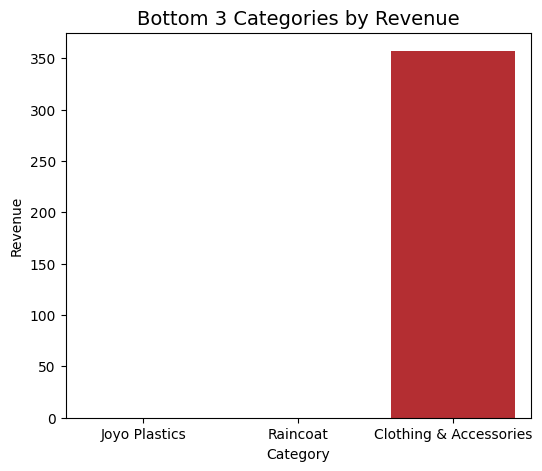

In [ ]:
#Bottom 3 Categories by Revenue

plt.figure(figsize=(6,5))
sns.barplot(data=bottom3_categories, x="Category", y="total_revenue", palette="Reds")
plt.title("Bottom 3 Categories by Revenue", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


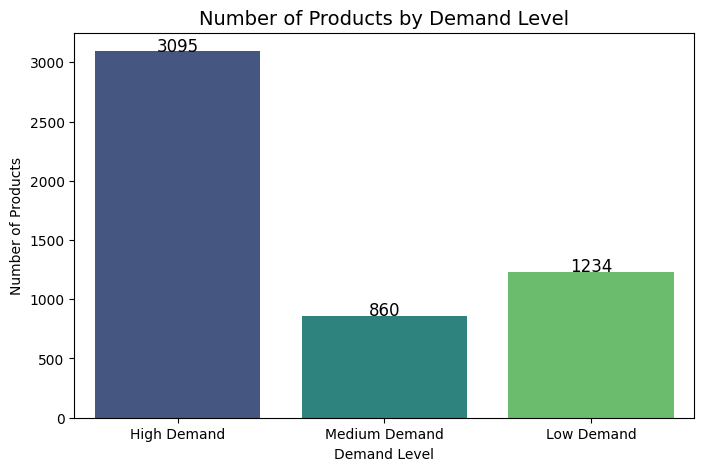

In [ ]:
#Demand Level Classification of Products

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Demand Classification Count
demand_counts = demand_classification['demand_level'].value_counts().reindex(['High Demand', 'Medium Demand', 'Low Demand'])

plt.figure(figsize=(8,5))
sns.barplot(x=demand_counts.index, y=demand_counts.values, palette="viridis")
plt.title("Number of Products by Demand Level", fontsize=14)
plt.xlabel("Demand Level")
plt.ylabel("Number of Products")

# Bars ke upar values show karna
for i, v in enumerate(demand_counts.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=12)

plt.show()






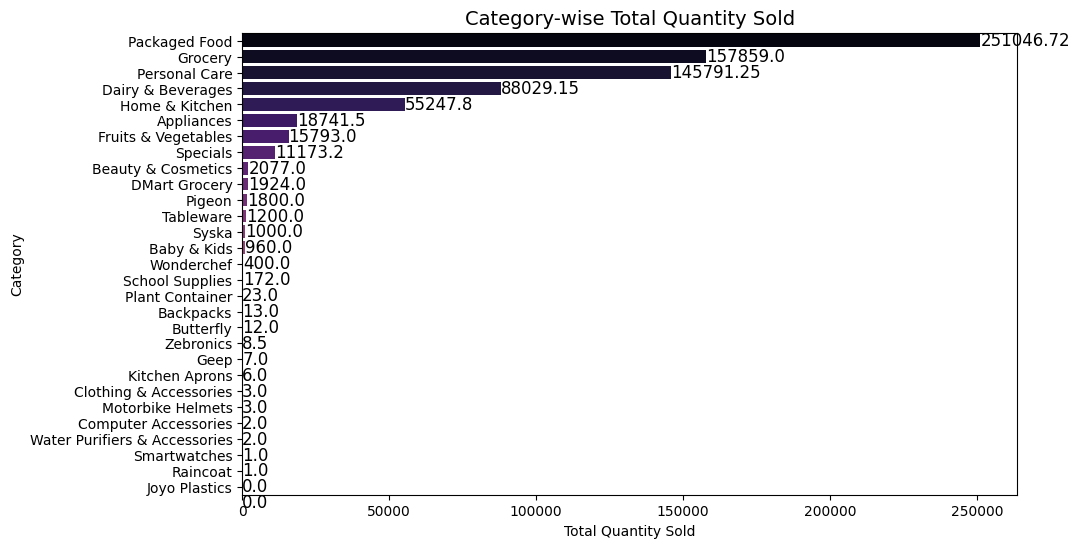

In [ ]:
# ✅ Step 2: Category-wise Total Demand
plt.figure(figsize=(10,6))
sns.barplot(x='total_quantity_sold', y='Category', data=category_demand, palette="magma")
plt.title("Category-wise Total Quantity Sold", fontsize=14)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Category")

# Bars ke upar values show karna
for i, v in enumerate(category_demand['total_quantity_sold']):
    plt.text(v + 5, i, str(v), va='center', fontsize=12)

plt.show()

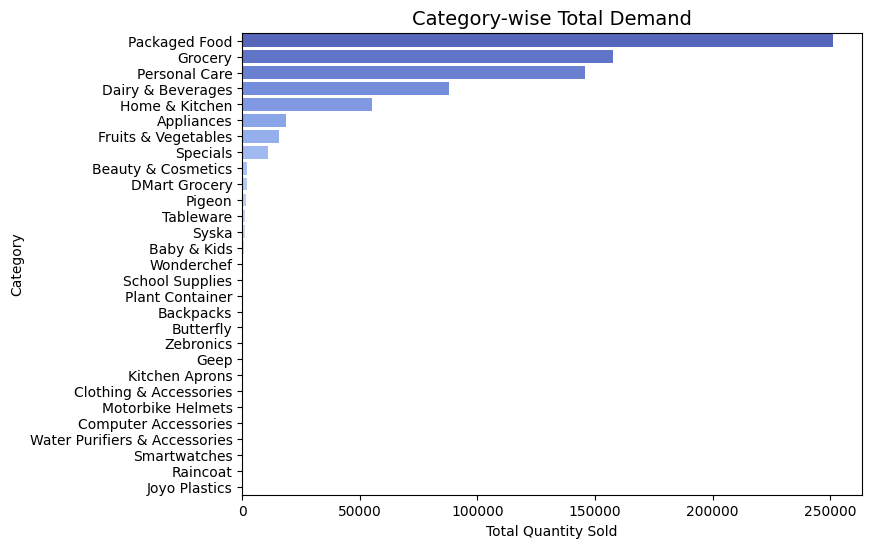

In [ ]:
#Category-wise Total Demand

plt.figure(figsize=(8,6))
sns.barplot(data=category_demand, y="Category", x="total_quantity_sold", palette="coolwarm")
plt.title("Category-wise Total Demand", fontsize=14)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Category")
plt.show()


#                                                            END 

In [ ]:
df.to_csv("final_output.csv", index=False)
